<strong> Team 10 - Cohort 2 Haight
WINDOWS OR MAC ANALYSIS </strong>

Keita Eriawan | Andrea Galura | Bhavya Garg | Evans Imade | Jose Pereira | Han Zhang

<strong>Background:</strong>

Apple has tasked us to researched the consumer buying behavior when deciding whether to buy Windows laptop or Mac laptop. The company is attempting to develop an analysis based on the consumer survey of Big 5 Personality Traits and the Hult DNA. Apple wants to know how the customer think when they are picking a new laptop, what kind of persona suits their brand and what consumers think about the competitor.

<strong> Data:</strong>
The survey data that is provided by Apple consists of the 50 questions of the Big 5 Personality Traits, 20 questions regarding the Hult DNA and demographics such as age, gender and nationality. The data is a representative of the population Apple is attempting to study 

<strong> Methodology: </strong>
1. Data explanatory analysis stage
2. Principal Component Analysis
3. Clustering the data
4. Visualising the Data
5. Insight & Analysis

***

# <strong>Data Explanatory Analysis Stage 

***

First, we will run the necessary packages for our analysis

In [45]:
# Loading the required packages #
import pandas as pd                                       
import matplotlib.pyplot as plt                           
import seaborn as sns                                     
from sklearn.preprocessing import StandardScaler          
from sklearn.decomposition import PCA                     
from scipy.cluster.hierarchy import dendrogram, linkage   
from sklearn.cluster import KMeans                        

***

The next step is to import the data from excel

In [46]:
# Load the data from excel #
survey_df = pd.read_excel('survey_data-1.xlsx')

# setting print options #
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)

***

We will load several def functions that will be useful for our analysis. The def functions are <strong> intertia_plot </strong> and  <strong> scree_plot </strong>

In [47]:
# Inertia Plot def function #

def inertia_plot(data, max_clust = 10):
    """
PARAMETERS
----------
data      : DataFrame, data from which to build clusters. Dataset should be scaled
max_clust : int, maximum of range for how many clusters to check interia, default 50
    """

    ks = range(1, max_clust)
    inertias = []


    for k in ks:
        # INSTANTIATING a kmeans object
        model = KMeans(n_clusters = k)


        # FITTING to the data
        model.fit(data)


        # append each inertia to the list of inertias
        inertias.append(model.inertia_)



    # plotting ks vs inertias
    fig, ax = plt.subplots(figsize = (12, 8))
    plt.plot(ks, inertias, '-o')


    # labeling and displaying the plot
    plt.xlabel('number of clusters, k')
    plt.ylabel('inertia')
    plt.xticks(ks)
    plt.show()


# Scree plot def function #
def scree_plot(pca_object, export = False):
    # building a scree plot

    # setting plot size
    fig, ax = plt.subplots(figsize=(10, 8))
    features = range(pca_object.n_components_)


    # developing a scree plot
    plt.plot(features,
             pca_object.explained_variance_ratio_,
             linewidth = 2,
             marker = 'o',
             markersize = 10,
             markeredgecolor = 'black',
             markerfacecolor = 'grey')


    # setting more plot options
    plt.title('Scree Plot')
    plt.xlabel('PCA feature')
    plt.ylabel('Explained Variance')
    plt.xticks(features)

    if export == True:
    
        # exporting the plot
        plt.savefig('top_survey_correlation_scree_plot.png')
        
    # displaying the plot
    plt.show()

***

Now, we are going to divide the data frame into 3 different part. The purpose of the separation is to conduct the Principal Component Analysis (PCA). We do not want to mix all of the metrics (personality test, Hult DNA and demographic) so we would like to divide them.

***

# Principal Component Analysis

Now, we are going to conduct the principal component analysis to identify the different persona of the survey takers

<strong> Big 5 Personalities Trait

For the big 5 personality traits, we are using these documentation for the calculation of the scores: https://openpsychometrics.org/printable/big-five-personality-test.pdf

Each question will be divided into 5 different traits: Extroversion, Agreeableness, Conscientiousness, Neuroticism and Openness to Experiences. Based on the document, all of the odd number questions are positive so we will add it to the total and all of the even number questions are negative so we will subtract that from the total points.


In [48]:
# separating the big five personality into a dataframe #
big_five_df = survey_df.iloc[:,1:51]

# Creating the columns in the dataframe #
big_five_df.columns = np.arange(1,51)

# Creating the new columns with the calculation #
big_five_df['Extroversion'] = big_five_df[1]-big_five_df[6]+\
                              big_five_df[11]-big_five_df[16]+\
                              big_five_df[21]-big_five_df[26]+\
                              big_five_df[31]-big_five_df[36]+\
                              big_five_df[41]-big_five_df[46]+20

big_five_df['Agreeableness'] =14 - big_five_df[2]+big_five_df[7]-\
                                   big_five_df[12]+big_five_df[17]-\
                                   big_five_df[22]+big_five_df[27]-\
                                   big_five_df[32]+big_five_df[37]+\
                                   big_five_df[42]+big_five_df[47]

big_five_df['Conscientiousness'] =14 + big_five_df[3]-big_five_df[8]+\
                                       big_five_df[13]-big_five_df[18]+\
                                       big_five_df[23]-big_five_df[28]+\
                                       big_five_df[33]-big_five_df[38]+\
                                       big_five_df[43]+big_five_df[48]

big_five_df['Neuroticism'] =38 - big_five_df[4]+big_five_df[9]-\
                                 big_five_df[14]+big_five_df[19]-\
                                 big_five_df[24]-big_five_df[29]-\
                                 big_five_df[34]-big_five_df[39]-\
                                 big_five_df[44]-big_five_df[49]

big_five_df['Openness_to_Experience'] =8 + big_five_df[5]-big_five_df[10]+\
                                           big_five_df[15]-big_five_df[20]+\
                                           big_five_df[25]-big_five_df[30]+\
                                           big_five_df[35]+big_five_df[40]+\
                                           big_five_df[45]+big_five_df[50]


# Creating new column name #
big_five_df = big_five_df[['Extroversion','Agreeableness',
                          'Conscientiousness','Neuroticism',
                          'Openness_to_Experience']]

***

For the first stage, we will standardize the data so that the mean and the standard deviation is 1

In [49]:
# standardize big_five_df #
scaler = StandardScaler()

# fitting the big_five_df #
scaler.fit(big_five_df)

# Transforming the data #
X_big_five_scaled = scaler.transform(big_five_df)

# Creating the data frame with the scaled data #
big_five_scaled_df = pd.DataFrame(X_big_five_scaled)

# renaming the columns for the new data set #
big_five_scaled_df.columns = big_five_df.columns

# checking pre and post scaling variance #
print(pd.np.var(big_five_df),'\n\n')
print(pd.np.var(big_five_scaled_df))

Extroversion              42.548753
Agreeableness             32.148642
Conscientiousness         30.730066
Neuroticism               47.010968
Openness_to_Experience    27.528345
dtype: float64 


Extroversion              1.0
Agreeableness             1.0
Conscientiousness         1.0
Neuroticism               1.0
Openness_to_Experience    1.0
dtype: float64


***

We will now plot the scree plot so that to check the ideal components for the PCA object

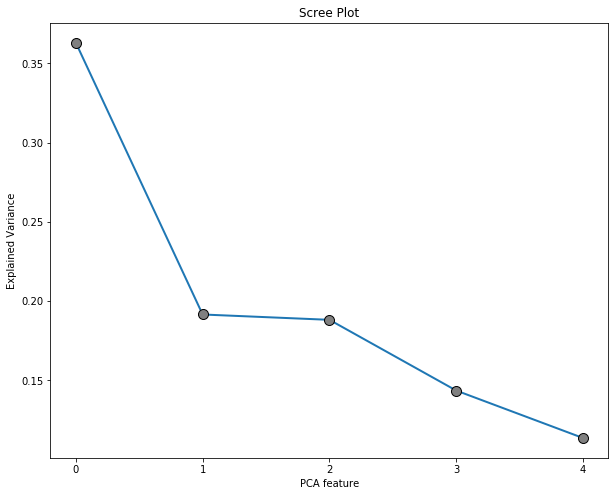

In [50]:
# Instantiating PCA object with no limit to principal components #
pca = PCA(n_components = None,
          random_state = 802)


# fitting and transforming the scaled data #
big_five_pca = pca.fit_transform(big_five_scaled_df)


# calling the scree_plot function
scree_plot(pca_object = pca)

***

Now, we will try it with 3 components 

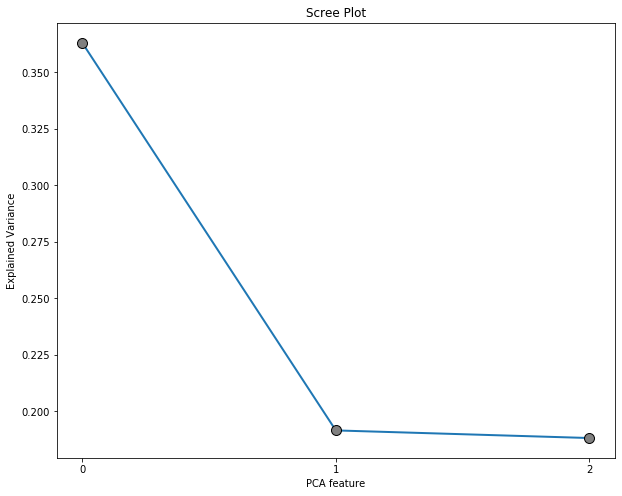

In [51]:
# Instantiating a new model using the 3 principal components #
pca_3 = PCA(n_components = 3,
          random_state = 802)


# fitting and transforming the scaled data #
big_five_pca = pca_3.fit_transform(big_five_scaled_df)

# Plotting the scree plot with 3 components #
scree_plot(pca_object = pca_3)

***

For this stage, we are comparing the variance of the PCA model with unlimited component and PCA model with 3 components. 

In [52]:
### Unlimited component PCA model ###

# transposing pca components (pc = MAX)
factor_loadings = pd.DataFrame(pd.np.transpose(pca.components_))


# naming rows as original features
factor_loadings = factor_loadings.set_index(big_five_scaled_df.columns)


### 3 component PCA model ###

# transposing pca components (pc = 3)
factor_loadings_3 = pd.DataFrame(pd.np.transpose(pca_3.components_))


# naming rows as original features
factor_loadings_3 = factor_loadings_3.set_index(big_five_scaled_df.columns)


# checking the results
print(f"""
MAX Components Factor Loadings
------------------------------
{factor_loadings.round(2)}


3 Components Factor Loadings
------------------------------
{factor_loadings_3.round(2)}
""")



MAX Components Factor Loadings
------------------------------
                           0     1     2     3     4
Extroversion           -0.34  0.54 -0.69  0.02 -0.35
Agreeableness          -0.51  0.17  0.21  0.72  0.38
Conscientiousness      -0.52 -0.33  0.36 -0.03 -0.70
Neuroticism            -0.30 -0.72 -0.56 -0.03  0.28
Openness_to_Experience -0.51  0.23  0.21 -0.69  0.41


3 Components Factor Loadings
------------------------------
                           0     1     2
Extroversion           -0.34  0.54 -0.69
Agreeableness          -0.51  0.17  0.21
Conscientiousness      -0.52 -0.33  0.36
Neuroticism            -0.30 -0.72 -0.56
Openness_to_Experience -0.51  0.23  0.21



***

After we find out the variance of the PCA model, we will know brainstorm to find the appropriate name for our principal components 

In [53]:
# Naming the factor loadings #

factor_loadings_3.columns = ['rebels',
                             'party people',
                             'intellectual']

***

After we named the factor loadings, we will convert them into a dataframe

In [54]:
# analyzing factor strengths per customer
X_pca_reduced = pca_3.transform(big_five_scaled_df)


# converting to a DataFrame
X_pca_df = pd.DataFrame(X_pca_reduced)

# Naming the columns #
X_pca_df.columns = ['rebels',
                    'party people',
                    'intellectual']
# checking the results
X_pca_df

,rebels,party people,intellectual
0,-0.025988,-0.221107,0.133741
1,0.271296,-0.320236,0.919580
2,0.630724,-1.498449,-1.660751
3,0.150387,0.540674,0.403534
4,1.699904,0.501627,-0.311654
5,1.984025,1.034685,0.947709
6,1.206794,0.975333,0.667232
7,3.171151,-0.468405,-2.174911
8,-1.300187,-0.305141,-1.277151
9,0.907342,-0.873461,0.104600


<strong> Hult DNA 

We will conduct the same process for the "Hult DNA" dataframe. For the reference of the scoring, we found information about the Hult DNA frame from this link: https://www.hult.edu/blog/why-every-leader-needs-growth-mindset/

We dropped the 3 duplicates that we found in the data frame and we group the 18 survey questions based on the 9 skills that is mention on the link above. 

For the calculation, we use the same method as the big 5 personalities so the positive question, we will add the score and the negative question, we will subtract the scores

In [55]:
# Hult DNA with the 8 Personality Characteristics

hult_dna_df = survey_df.iloc[:,51:-7].drop(['Respond effectively to multiple priorities.1',
                                           "Take initiative even when circumstances, objectives, or rules aren't clear.1",
                                          'Encourage direct and open discussions.1'],axis = 1)


#1 Demonstrate
hult_dna_df['Demonstrate Dynamic Thinking'] = hult_dna_df.iloc[:, 0] -\
                            hult_dna_df.iloc[:, 1] +\
                            hult_dna_df.iloc[:, 5] +\
                            hult_dna_df.iloc[:, 13]


#2 Show Self Awareness
hult_dna_df['Show Self Awareness'] = hult_dna_df.iloc[:, 2] +\
                                        hult_dna_df.iloc[:, 15]


#3 Embraces Change
hult_dna_df['Embraces Change'] = hult_dna_df.iloc[:, 3]


#4 Inspires Productivity
hult_dna_df['Inspires Productivity'] = hult_dna_df.iloc[:, 4]+\
                                        hult_dna_df.iloc[:, 16]+\
                                        hult_dna_df.iloc[:, 17]


#5 Speaks and Listen Skillfullly
hult_dna_df['Speaks and Listen Skillfullly'] = hult_dna_df.iloc[:, 6] +\
                                        hult_dna_df.iloc[:, 7]


#6 Influences Confidently
hult_dna_df['Influences Confidently'] = hult_dna_df.iloc[:, 11] -\
                                        hult_dna_df.iloc[:, 8]


#7 Foster collaborative relationships
hult_dna_df['Foster Collaborative Relationships'] = hult_dna_df.iloc[:, 9] +\
                                        hult_dna_df.iloc[:, 10] -\
                                        hult_dna_df.iloc[:, 12]

#8 Resolve Conflict Constructively
hult_dna_df['Resolve Conflict Constructively'] = hult_dna_df.iloc[:, 14]

hult_dna_8 = hult_dna_df.iloc[:,-8:]

#Checking if the hult_dna_8 was create right  
hult_dna_8

,Demonstrate Dynamic Thinking,Show Self Awareness,Embraces Change,Inspires Productivity,Speaks and Listen Skillfullly,Influences Confidently,Foster Collaborative Relationships,Resolve Conflict Constructively
0,10,8,4,12,8,1,6,4
1,10,7,4,13,10,0,5,5
2,7,8,3,13,6,2,5,2
3,8,8,5,15,9,2,5,5
4,6,8,3,9,7,0,2,3
5,8,8,4,11,7,-1,5,3
6,9,9,5,13,8,2,5,4
7,8,9,5,15,9,2,7,5
8,11,8,4,12,8,1,7,4
9,7,8,4,12,8,1,6,4


***

For the first stage, we will standardize the data so that the mean and the standard deviation is 1

In [56]:
# Standarizing the "hult_dna_8" in order to standarize the variance of variable

# INSTANTIATING a StandardScaler() object
scaler = StandardScaler()


# FITTING the scaler with the data
scaler.fit(hult_dna_8)


# TRANSFORMING our data after fit
hult_dna_8_scaled = scaler.transform(hult_dna_8)


# converting scaled data into a DataFrame
hult_scaled_df = pd.DataFrame(hult_dna_8_scaled)


# reattaching column names
hult_scaled_df.columns = hult_dna_8.columns


# checking pre- and post-scaling variance
print(pd.np.var(hult_dna_8), '\n\n')
print(pd.np.var(hult_scaled_df))

Demonstrate Dynamic Thinking          5.731593
Show Self Awareness                   1.522421
Embraces Change                       0.599195
Inspires Productivity                 3.351474
Speaks and Listen Skillfullly         1.495858
Influences Confidently                1.672081
Foster Collaborative Relationships    3.015503
Resolve Conflict Constructively       0.498774
dtype: float64 


Demonstrate Dynamic Thinking          1.0
Show Self Awareness                   1.0
Embraces Change                       1.0
Inspires Productivity                 1.0
Speaks and Listen Skillfullly         1.0
Influences Confidently                1.0
Foster Collaborative Relationships    1.0
Resolve Conflict Constructively       1.0
dtype: float64


***

We will now plot the scree plot so that to check the ideal components for the PCA object

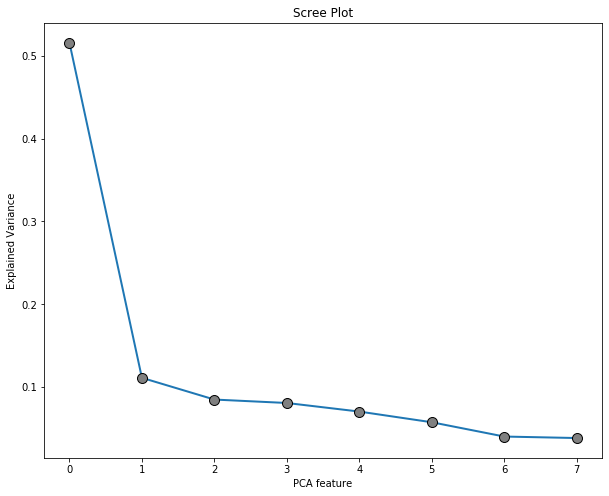

In [57]:
# Instantiating a PCA object with no limit to principal components
pca_hult = PCA(n_components = None,
         random_state = 802)

# Fitting and Transforming the hult_dna_8_scaled_df
hult_dna_8_pca = pca_hult.fit_transform(hult_scaled_df)

# Calling the scree_plot funtion
scree_plot(pca_object = pca_hult)

***

We want to be constant with the Big 5 personalities so we will do it with 3 components 

In [58]:
# Instantiating a new model using the first 3 principal components using the scree_plot

# According to the previous scree_plot, for the Hult DNA we are choosing 3 PCA features
pca_hult_3 = PCA(n_components = 3,
         random_state = 802)

# Fitting and Transforming the hult_dna_8_scaled_df
hult_dna_8_pca_3 = pca_hult_3.fit_transform(hult_scaled_df)

***

In [59]:
# to compare the variance of the unlimited PCA model with the variance of the reduced PCA model.

### Unlimited components PCA model ###

# transposing pca components (pc = MAX)
factor_loadings = pd.DataFrame(pd.np.transpose(pca_hult.components_))


# naming rows as original features
factor_loadings = factor_loadings.set_index(hult_scaled_df.columns)


### 3 components PCA model ###

# transposing pca components (pc = 3)
factor_loadings_3 = pd.DataFrame(pd.np.transpose(pca_hult_3.components_))


# naming rows as original features
factor_loadings_3 = factor_loadings_3.set_index(hult_scaled_df.columns)


# checking the results
print(f"""
MAX Components Factor Loadings
------------------------------
{factor_loadings.round(2)}


3 Components Factor Loadings
------------------------------
{factor_loadings_3.round(2)}
""")


MAX Components Factor Loadings
------------------------------
                                       0     1     2     3     4     5     6     7
Demonstrate Dynamic Thinking       -0.36  0.16  0.31 -0.40 -0.35 -0.56 -0.01 -0.39
Show Self Awareness                -0.33 -0.56  0.15 -0.13  0.47  0.27  0.11 -0.48
Embraces Change                    -0.33 -0.12 -0.75 -0.41 -0.09  0.06 -0.36  0.11
Inspires Productivity              -0.41 -0.10  0.21 -0.22  0.21 -0.14  0.36  0.73
Speaks and Listen Skillfullly      -0.37 -0.11 -0.29  0.47 -0.47  0.08  0.56 -0.12
Influences Confidently             -0.30  0.70  0.09 -0.18  0.08  0.59  0.10 -0.11
Foster Collaborative Relationships -0.34  0.31 -0.19  0.50  0.53 -0.42 -0.19 -0.08
Resolve Conflict Constructively    -0.38 -0.18  0.39  0.34 -0.31  0.24 -0.61  0.19


3 Components Factor Loadings
------------------------------
                                       0     1     2
Demonstrate Dynamic Thinking       -0.36  0.16  0.31
Show Self Awareness   

***

Now, we are naming the principal components for the Hult DNA 

In [60]:
# Rename each PCA

# naming each principal component
factor_loadings_3.columns = ['Non Hult Material',
                             'Copy Cat',
                             'Autocratic']


# checking the result
factor_loadings_3

,Non Hult Material,Copy Cat,Autocratic
Demonstrate Dynamic Thinking,-0.364768,0.159920,0.307128
Show Self Awareness,-0.334818,-0.560831,0.147331
Embraces Change,-0.329793,-0.118803,-0.747555
Inspires Productivity,-0.408424,-0.098763,0.207301
Speaks and Listen Skillfullly,-0.368425,-0.105029,-0.294799
Influences Confidently,-0.295844,0.704433,0.087784
Foster Collaborative Relationships,-0.338604,0.312257,-0.187741
Resolve Conflict Constructively,-0.375971,-0.176817,0.390251


***

The next stage is to convert the factor loadings into a dataframe

In [61]:
# analyzing factor strengths per personality
X_pca_reduced_hult = pca_hult_3.transform(hult_scaled_df)


# converting to a DataFrame
X_pca_df_hult = pd.DataFrame(X_pca_reduced_hult)

X_pca_df_hult.columns = ['Non Hult Material',
                             'Copy Cat',
                             'Autocratic']

# checking the results
X_pca_df_hult

,Non Hult Material,Copy Cat,Autocratic
0,-0.028190,0.068117,0.231893
1,-0.690976,-0.677997,0.336455
2,2.265232,1.004678,0.478923
3,-1.686190,-0.352089,-0.163168
4,3.518938,-0.811554,0.397802
5,1.985789,-0.944645,-0.477118
6,-0.830127,-0.295689,-0.453488
7,-2.347527,-0.446986,-0.259988
8,-0.375543,0.314733,0.252067
9,0.428899,-0.132278,-0.152966


***

For the final step, we will concatenate both of the dataframe (Hult DNA and Big 5 personalities) for the clustering method. The reason is because we have created different persona from each metrics and for the clustering, we will combine them and analyze it together.

In [62]:
# concatenating cluster memberships with principal components
clst_pca_df = pd.concat([X_pca_df_hult,
                         X_pca_df],
                         axis = 1)

We need to check the variance first

In [63]:
# Check the variance if it is not 1, we standardize again
pd.np.var(clst_pca_df)

Non Hult Material    4.126881
Copy Cat             0.890049
Autocratic           0.680126
rebels               1.815486
party people         0.957818
intellectual         0.940969
dtype: float64

# Cluster Analysis

Before we do our cluster analysis, we would like to scale the data first because the variance of the dataset is not equal for the PCA analysis

In [64]:
# Instantiate a StandardScaler() object
scaler = StandardScaler()


# fitting the scaler with the data
scaler.fit(clst_pca_df)


# transforming our data after fit
clst_pca_scaled = scaler.transform(clst_pca_df)


# converting scaled data into a DataFrame
clst_pca_scaled_df = pd.DataFrame(clst_pca_scaled)

# reattaching column names
clst_pca_scaled_df.columns = clst_pca_df.columns

# checking pre- and post-scaling variance
print(pd.np.var(clst_pca_df), '\n\n')
print(pd.np.var(clst_pca_scaled_df))

Non Hult Material    4.126881
Copy Cat             0.890049
Autocratic           0.680126
rebels               1.815486
party people         0.957818
intellectual         0.940969
dtype: float64 


Non Hult Material    1.0
Copy Cat             1.0
Autocratic           1.0
rebels               1.0
party people         1.0
intellectual         1.0
dtype: float64


We need to find the component for the KMeans clustering so we will look at the dendrogram and the inertia plot to check the ideal components numbers.

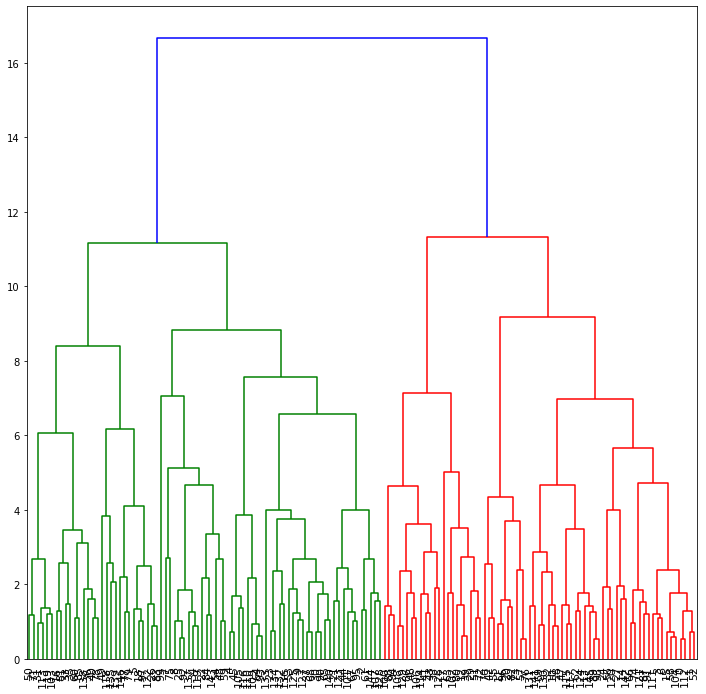

In [65]:
# grouping data based on Ward distance
standard_mergings_ward = linkage(y = clst_pca_scaled_df,
                                 method = 'ward')


# setting plot size
fig, ax = plt.subplots(figsize=(12, 12))

# developing a dendrogram
dendrogram(Z = standard_mergings_ward,
           leaf_rotation = 90,
           leaf_font_size = 11)


# saving and displaying the plot
plt.savefig('standard_hierarchical_clust_ward.png')
plt.show()

***

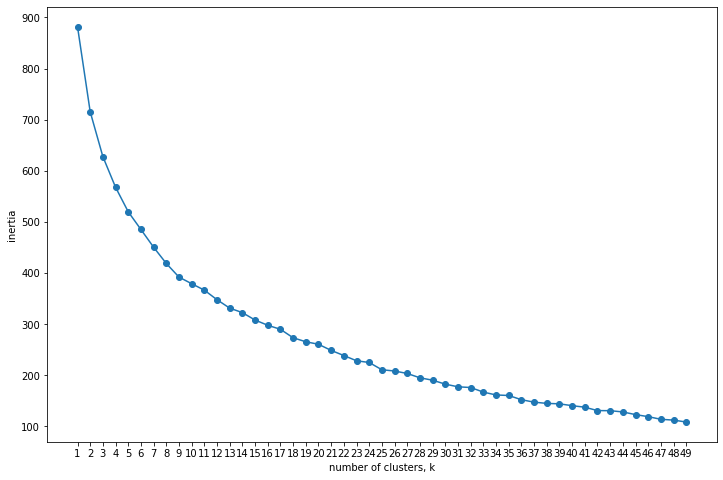

In [66]:
# calling the inertia_plot() function
inertia_plot(data = clst_pca_scaled_df, max_clust = 50)

Based on our inertia and dendrogram plot, we will pick 7 components

In [67]:
# INSTANTIATING a k-Means object with 7 clusters
clst_k_pca = KMeans(n_clusters = 7,
                         random_state = 802)


# fitting the object to the data
clst_k_pca.fit(clst_pca_scaled)


# converting the clusters to a DataFrame
clst_kmeans_pca = pd.DataFrame({'Cluster': clst_k_pca.labels_})


# checking the results
print(clst_kmeans_pca.iloc[: , 0].value_counts())

1    32
3    25
2    19
0    19
5    18
4    18
6    16
Name: Cluster, dtype: int64


***

Now, we will identify the centroids of each principal components 

In [68]:
# storing cluster centers
centroids_pca = clst_k_pca.cluster_centers_


# converting cluster centers into a DataFrame
centroids_pca_df = pd.DataFrame(centroids_pca)


# renaming principal components
centroids_pca_df.columns = ['Non Hult Material',
                            'Copy Cat',
                            'Autocratic',
                            'rebels',
                            'party people',
                            'intellectual']


# checking results (clusters = rows, pc = columns)
centroids_pca_df.round(2)

,Non Hult Material,Copy Cat,Autocratic,rebels,party people,intellectual
0,0.64,-0.16,-0.64,0.52,-0.88,0.15
1,-0.36,-0.35,0.65,-0.25,-0.20,1.09
2,0.03,0.93,0.41,0.09,-0.71,-0.91
3,-0.32,-0.89,-0.68,-0.55,-0.12,-0.74
4,0.21,-0.10,-0.15,0.79,1.50,0.22
5,-1.36,0.78,-0.08,-1.44,0.66,-0.06
6,1.73,0.40,0.30,1.37,0.04,-0.30


We will concatenate the cluster with the principal components 

In [69]:
# Concatenating cluster with principal components
final_withnon_categorical = pd.concat([clst_pca_scaled_df,
                             clst_kmeans_pca],
                                      axis = 1)

Creating the final df

In [70]:
# Creating the a dataframe for the Categorical variables

categorical_df = survey_df.iloc[:,-7:]

###  need one more step to lowercase
categorical_df.iloc[:,-2] = categorical_df.iloc[:,-2].str.lower()

#Checking if the hult_dna_8 was create right
categorical_df

,What laptop do you currently have?,What laptop would you buy in next assuming if all laptops cost the same?,What program are you in?,What is your age?,Gender,What is your nationality?,What is your ethnicity?
0,Macbook,Macbook,DD (MIB & Business Analytics),25,Female,ecuador,Hispanic / Latino
1,Windows laptop,Windows laptop,One year Business Analytics,27,Male,ecuador,Hispanic / Latino
2,Windows laptop,Windows laptop,One year Business Analytics,25,Male,indian,West Asian / Indian
3,Windows laptop,Windows laptop,One year Business Analytics,26,Female,indian,West Asian / Indian
4,Macbook,Windows laptop,DD (MBA & Disruptive innovation),27,Male,china,Far east Asian
5,Macbook,Macbook,DD (MIB & Business Analytics),22,Male,indian,West Asian / Indian
6,Windows laptop,Macbook,DD (MIB & Business Analytics),23,Female,dominican,Hispanic / Latino
7,Macbook,Macbook,DD (MIB & Business Analytics),23,Male,belgian,White / Caucasian
8,Windows laptop,Windows laptop,DD (MIB & Business Analytics),25,Female,swiss,White / Caucasian
9,Macbook,Macbook,DD (MBA & Business Analytics),38,Male,japan,Far east Asian


In [71]:
# Creating the final df #
final_df = pd.concat([categorical_df,
                                final_withnon_categorical],axis = 1)


# renaming regions
cluster_names = {0 : 'Cluster 1',
                 1 : 'Cluster 2',
                 2 : 'Cluster 3',
                 3 : 'Cluster 4',
                 4 : 'Cluster 5',
                 5 : 'Cluster 6',
                 6 : 'Cluster 7'}


final_df['Cluster'].replace(cluster_names, inplace = True)

data_df = final_df

data_df

,What laptop do you currently have?,What laptop would you buy in next assuming if all laptops cost the same?,What program are you in?,What is your age?,Gender,What is your nationality?,What is your ethnicity?,Non Hult Material,Copy Cat,Autocratic,rebels,party people,intellectual,Cluster
0,Macbook,Macbook,DD (MIB & Business Analytics),25,Female,ecuador,Hispanic / Latino,-0.013877,0.072202,0.281186,-0.019288,-0.225924,0.137872,Cluster 2
1,Windows laptop,Windows laptop,One year Business Analytics,27,Male,ecuador,Hispanic / Latino,-0.340135,-0.718656,0.407974,0.201348,-0.327212,0.947986,Cluster 2
2,Windows laptop,Windows laptop,One year Business Analytics,25,Male,indian,West Asian / Indian,1.115069,1.064927,0.580726,0.468105,-1.531089,-1.712052,Cluster 3
3,Windows laptop,Windows laptop,One year Business Analytics,26,Female,indian,West Asian / Indian,-0.830033,-0.373204,-0.197852,0.111612,0.552451,0.415999,Cluster 2
4,Macbook,Windows laptop,DD (MBA & Disruptive innovation),27,Male,china,Far east Asian,1.732210,-0.860222,0.482361,1.261618,0.512553,-0.321281,Cluster 7
5,Macbook,Macbook,DD (MIB & Business Analytics),22,Male,indian,West Asian / Indian,0.977512,-1.001294,-0.578537,1.472484,1.057223,0.976984,Cluster 5
6,Windows laptop,Macbook,DD (MIB & Business Analytics),23,Female,dominican,Hispanic / Latino,-0.408633,-0.313421,-0.549884,0.895646,0.996578,0.687843,Cluster 5
7,Macbook,Macbook,DD (MIB & Business Analytics),23,Male,belgian,White / Caucasian,-1.155579,-0.473791,-0.315253,2.353533,-0.478608,-2.242095,Cluster 3
8,Windows laptop,Windows laptop,DD (MIB & Business Analytics),25,Female,swiss,White / Caucasian,-0.184862,0.333607,0.305647,-0.964960,-0.311788,-1.316603,Cluster 3
9,Macbook,Macbook,DD (MBA & Business Analytics),38,Male,japan,Far east Asian,0.211127,-0.140210,-0.185482,0.673402,-0.892487,0.107831,Cluster 1


Finally, we will plot the box and whisker to visualise the final data

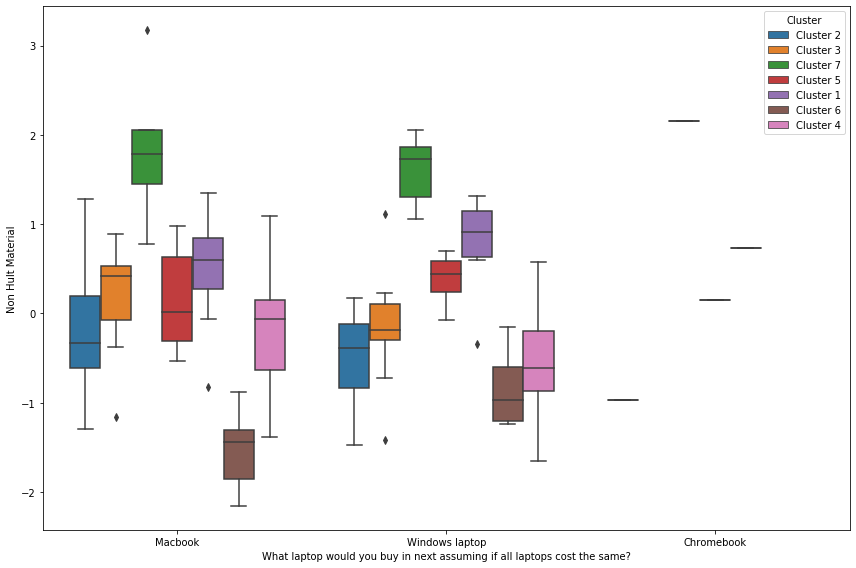

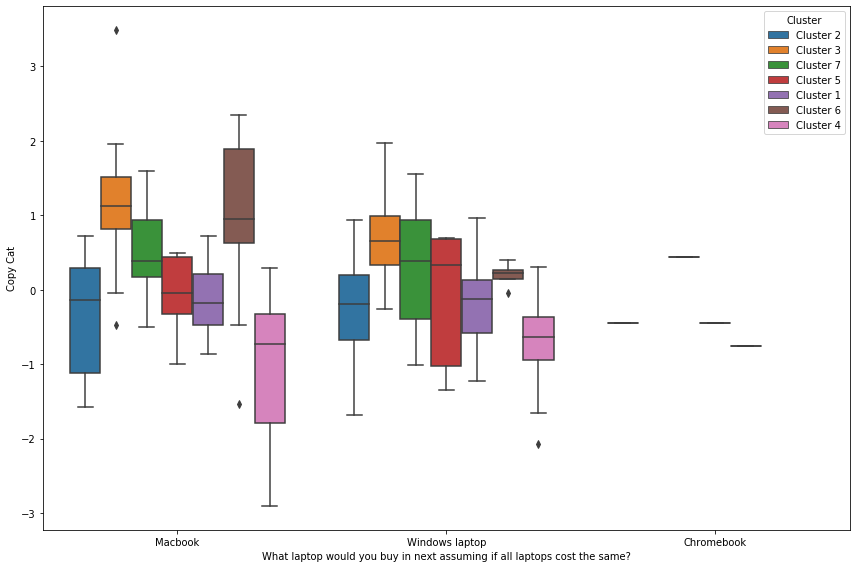

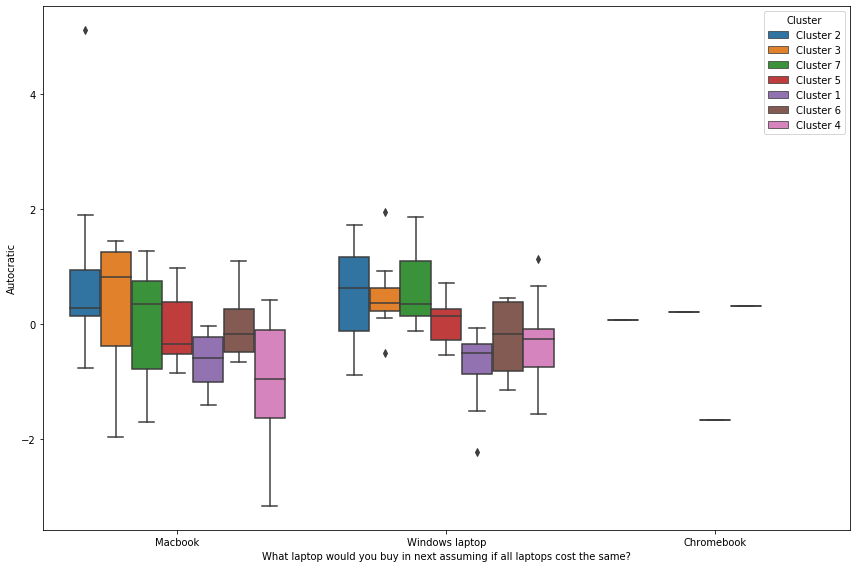

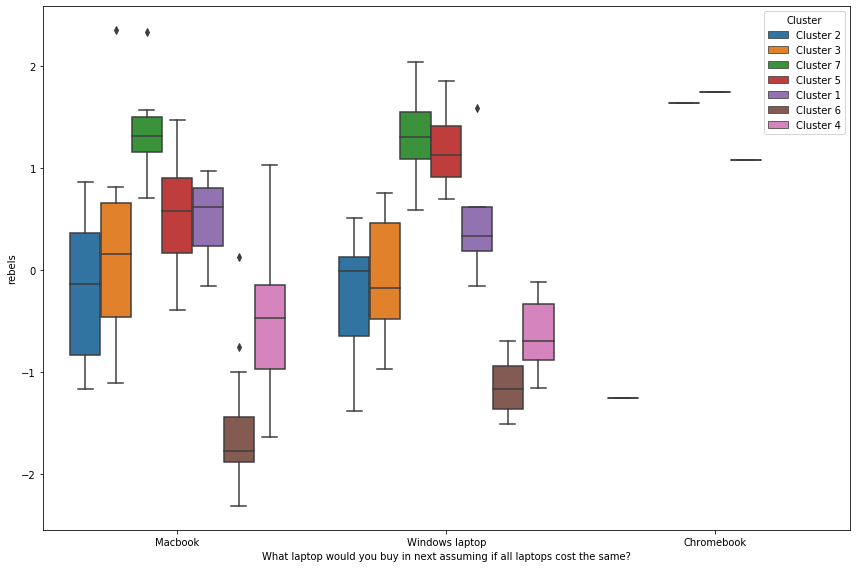

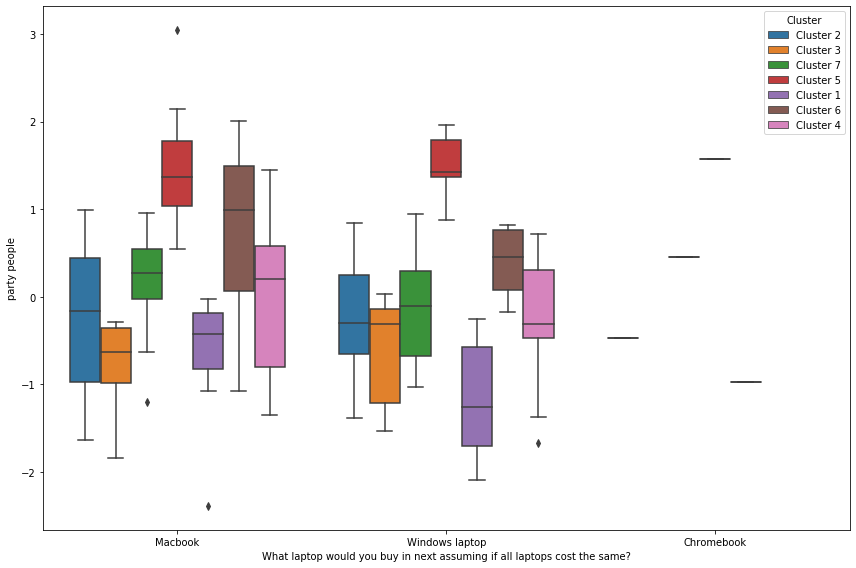

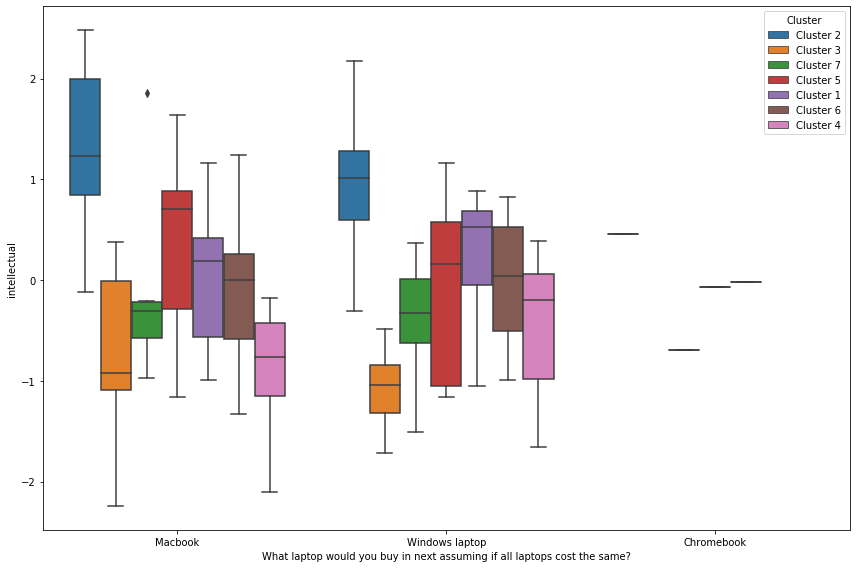

In [72]:
########################
# Next laptop!
########################
# Non Hult Material
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'What laptop would you buy in next assuming if all laptops cost the same?',
            y = 'Non Hult Material',
            hue = 'Cluster',
            data = data_df)


plt.tight_layout()
plt.show()



# Copy Cat
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'What laptop would you buy in next assuming if all laptops cost the same?',
            y = 'Copy Cat',
            hue = 'Cluster',
            data = data_df)


plt.tight_layout()
plt.show()



# Autocratic
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'What laptop would you buy in next assuming if all laptops cost the same?',
            y = 'Autocratic',
            hue = 'Cluster',
            data = data_df)


plt.tight_layout()
plt.show()



# rebels
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'What laptop would you buy in next assuming if all laptops cost the same?',
            y = 'rebels',
            hue = 'Cluster',
            data = data_df)


plt.tight_layout()
plt.show()


# party people
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'What laptop would you buy in next assuming if all laptops cost the same?',
            y = 'party people',
            hue = 'Cluster',
            data = data_df)


plt.tight_layout()
plt.show()


# intellectual
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'What laptop would you buy in next assuming if all laptops cost the same?',
            y = 'intellectual',
            hue = 'Cluster',
            data = data_df)


plt.tight_layout()
plt.show()